# Homework 3

In [1]:
from scipy.io import arff
import pandas as pd
import numpy as np

data = arff.loadarff("4year.arff")
df = pd.DataFrame(data[0])
df['bankruptcy'] = (df['class'] == b'1')
del df['class']
df.columns = ['X{0:02d}'.format(k) for k in range(1,65)] + ['bankruptcy']
df.head()

,X01,X02,X03,X04,X05,X06,X07,X08,X09,X10,...,X56,X57,X58,X59,X60,X61,X62,X63,X64,bankruptcy
0,0.159290,0.46240,0.07773,1.1683,-44.853,0.467020,0.189480,0.82895,1.1223,0.38330,...,0.108990,0.41557,0.89101,0.001422,7.7928,4.9914,119.810,3.0465,3.0560,False
1,-0.127430,0.46243,0.26917,1.7517,7.597,0.000925,-0.127430,1.16250,1.2944,0.53757,...,-0.089372,-0.23704,1.06250,0.150410,5.4327,3.4629,100.970,3.6150,3.4725,False
2,0.070488,0.23570,0.52781,3.2393,125.680,0.163670,0.086895,2.87180,1.0574,0.67689,...,0.054286,0.10413,0.94571,0.000000,7.1070,3.3808,76.076,4.7978,4.7818,False
3,0.136760,0.40538,0.31543,1.8705,19.115,0.504970,0.136760,1.45390,1.1144,0.58938,...,0.102630,0.23203,0.89737,0.073024,6.1384,4.2241,88.299,4.1337,4.6484,False
4,-0.110080,0.69793,0.18878,1.2713,-15.344,0.000000,-0.110080,0.43282,1.7350,0.30207,...,0.439880,-0.36440,0.57153,0.000000,18.8010,2.7925,146.390,2.4934,15.0360,False


In [2]:
df.describe()

,X01,X02,X03,X04,X05,X06,X07,X08,X09,X10,...,X55,X56,X57,X58,X59,X60,X61,X62,X63,X64
count,9791.000000,9791.000000,9791.000000,9749.000000,9.771000e+03,9791.000000,9791.000000,9773.000000,9792.000000,9791.000000,...,9.792000e+03,9771.000000,9791.000000,9776.000000,9791.000000,9178.000000,9760.000000,9.771000e+03,9749.000000,9561.000000
mean,0.043019,0.596404,0.130959,8.136600,6.465164e+01,-0.059273,0.059446,19.884016,1.882296,0.389040,...,7.686330e+03,-0.992263,0.035022,1.133287,0.856053,118.156064,25.194430,2.015157e+03,8.660813,35.949619
std,0.359321,4.587122,4.559074,290.647281,1.475939e+04,6.812754,0.533344,698.697015,17.674650,4.590299,...,7.605261e+04,77.007971,8.945365,8.038201,26.393305,3230.316692,1099.260821,1.171461e+05,60.838202,483.318623
min,-12.458000,0.000000,-445.910000,-0.045319,-3.794600e+05,-486.820000,-12.458000,-1.848200,-0.032371,-445.910000,...,-7.132200e+05,-7522.100000,-597.420000,-30.892000,-284.380000,0.000000,-12.656000,-1.496500e+04,-0.024390,-0.000015
25%,0.001321,0.263145,0.020377,1.047000,-5.121700e+01,-0.000578,0.003004,0.428300,1.006675,0.294440,...,2.184000e+01,0.003121,0.008768,0.885722,0.000000,5.356325,4.267700,4.323400e+01,2.938800,2.012900
50%,0.041364,0.467740,0.199290,1.591800,-5.557600e-02,0.000000,0.048820,1.088700,1.161300,0.510450,...,9.503300e+02,0.043679,0.098026,0.958305,0.002129,9.482000,6.283550,7.472900e+01,4.848900,4.041600
75%,0.111130,0.689255,0.410670,2.880400,5.573200e+01,0.065322,0.126940,2.691000,1.970225,0.714290,...,4.694550e+03,0.117170,0.242680,0.996163,0.211790,19.506000,9.938200,1.233450e+02,8.363800,9.413500
max,20.482000,446.910000,22.769000,27146.000000,1.034100e+06,322.200000,38.618000,53209.000000,1704.800000,12.602000,...,6.123700e+06,112.020000,226.760000,668.750000,1661.000000,251570.000000,108000.000000,1.077900e+07,5662.400000,21153.000000


In [3]:
sum(df.bankruptcy == True)

515

## Fill the NaN value

In [4]:
from sklearn.preprocessing import Imputer
imp_mean = Imputer(missing_values='NaN', strategy='mean')
X_imp = imp_mean.fit_transform(df.values)

## Split the data to train datasets and test datasets

In [5]:
from sklearn.model_selection import train_test_split
X,y = X_imp[:,:-1],X_imp[:,-1]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1,stratify=y)

## Standardization

In [6]:
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.fit_transform(X_test)

## Analyzing the principle components

In [7]:
from sklearn.decomposition import PCA
pca = PCA()
X_train_pca = pca.fit_transform(X_train_std)
pca.explained_variance_ratio_

array([1.79826175e-01, 1.08291925e-01, 7.79732380e-02, 7.37759644e-02,
       5.32757598e-02, 4.69459118e-02, 4.55508925e-02, 3.56709892e-02,
       2.84480871e-02, 2.52376386e-02, 2.37117656e-02, 2.14648898e-02,
       1.95492038e-02, 1.73536762e-02, 1.70515720e-02, 1.57157501e-02,
       1.56544552e-02, 1.55840430e-02, 1.55402519e-02, 1.54258523e-02,
       1.43452978e-02, 1.42343366e-02, 1.35623420e-02, 1.22273672e-02,
       1.18742641e-02, 1.16581007e-02, 1.03052752e-02, 8.83902613e-03,
       8.30193068e-03, 7.35176489e-03, 7.09936842e-03, 5.98259270e-03,
       4.93411479e-03, 3.08274271e-03, 2.81053727e-03, 2.16073352e-03,
       1.65140402e-03, 1.52096141e-03, 1.34503282e-03, 1.10949681e-03,
       7.94247123e-04, 7.84949619e-04, 5.40350581e-04, 3.75575193e-04,
       3.51518520e-04, 2.17189250e-04, 1.13342505e-04, 1.05645764e-04,
       1.01566252e-04, 5.21049381e-05, 2.61527310e-05, 2.11917350e-05,
       1.92060083e-05, 1.80989571e-05, 1.43137125e-05, 9.52844558e-06,
      

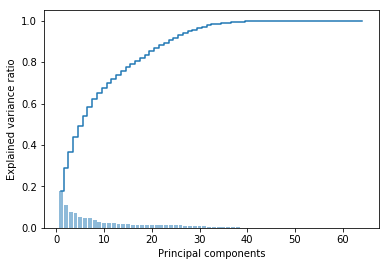

In [9]:
import matplotlib.pyplot as plt
plt.bar(range(1,65),pca.explained_variance_ratio_,alpha=0.5,align='center')
plt.step(range(1,65),np.cumsum(pca.explained_variance_ratio_),where='mid')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.show()

## Using Pipeline to implement the process via LR/SVM/Decission Tree

In [9]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import make_pipeline

pipe_lr = make_pipeline(StandardScaler(),
                        PCA(n_components=3),
                        LogisticRegression(random_state=1))
pipe_lr.fit(X_train, y_train)
y_pred = pipe_lr.predict(X_test)
print('LR_Test Accuracy: %.3f' % pipe_lr.score(X_test,y_test))

pipe_svm = make_pipeline(StandardScaler(),
                         PCA(n_components=3),
                         SVC(random_state=1))
pipe_svm.fit(X_train, y_train)
y_pred = pipe_svm.predict(X_test)
print('SVM_Test Accuracy: %.3f' % pipe_svm.score(X_test,y_test))

pipe_tree = make_pipeline(StandardScaler(),
                          PCA(n_components=3),
                          DecisionTreeClassifier(random_state=1))
pipe_tree.fit(X_train, y_train)
y_pred = pipe_tree.predict(X_test)
print('Tree_Test Accuracy: %.3f' % pipe_tree.score(X_test,y_test))

LR_Test Accuracy: 0.946
SVM_Test Accuracy: 0.947
Tree_Test Accuracy: 0.900


## Finding optimal hyperparameters

### LogisticRgression

In [10]:
from sklearn.model_selection import GridSearchCV

param_grid_lr = {'logisticregression__C':[0.001,0.01,0.1,1,10,100,1000]}

gs_lr = GridSearchCV(estimator=pipe_lr,
                     param_grid=param_grid_lr,
                     scoring='accuracy',
                     cv=10,
                     n_jobs=1)

gs_lr = gs_lr.fit(X_train,y_train)
print('LR_Train_Accuracy:%.3f' % gs_lr.best_score_)
print(gs_lr.best_params_)

clf_lr = gs_lr.best_estimator_
print('LR_Test_Accuracy: %.3f' % clf_lr.score(X_test, y_test))

LR_Train_Accuracy:0.947
{'logisticregression__C': 0.001}
LR_Test_Accuracy: 0.946


### SVM

**Note**:Because of the slow computation, I have to simplify the param_grid via only using the 'linear' kernel and three-dimension param_range. Otherwise, I cannot obtain the results although I have spent a long time.

In [11]:
param_range = [0.1, 1.0, 10.0]

pipe_svc = make_pipeline(StandardScaler(),
                         PCA(n_components=3),
                         SVC(random_state=1))

param_grid_svm = [{'svc__C': param_range, 
               'svc__kernel': ['linear']}]
#               {'svc__C': param_range, 
#                'svc__gamma': param_range, 
#                'svc__kernel': ['rbf']}]

gs_svm = GridSearchCV(pipe_svc, 
                  param_grid=param_grid_svm, 
                  scoring='accuracy', 
                  cv=10)

gs_svm = gs_svm.fit(X_train, y_train)
print('SVM_Train_Accuracy:%.3f' % gs_svm.best_score_)
print(gs_svm.best_params_)

clf_svm = gs_svm.best_estimator_
print('SVM_Test_Accuracy: %.3f' % clf_svm.score(X_test, y_test))

SVM_Train_Accuracy:0.947
{'svc__C': 0.1, 'svc__kernel': 'linear'}
SVM_Test_Accuracy: 0.947


### Decision Tree

In [26]:
max_depth = range(1,10,1)
min_samples_leaf = range(1,10,2)
tuned_parameters = dict(max_depth=max_depth, min_samples_leaf=min_samples_leaf)
DT = DecisionTreeClassifier()
gs_tree = GridSearchCV(DT, tuned_parameters,cv=10)
gs_tree.fit(X_train_std, y_train)
print(gs_tree.best_params_)

clf_tree = gs_tree.best_estimator_
print('Tree_Test_Accuracy: %.3f' % clf_tree.score(X_test, y_test))

{'max_depth': 4, 'min_samples_leaf': 3}
Tree_Test_Accuracy: 0.951
